In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
plt.style.use(['dark_background'])


# Strange oscillators

simple nonlinear combination of sinusoids yields weird action potential like behavior:
$f(x) = \sin(3x) - \frac{\sin(3x)}{\sin(2x)}$
`domain = np.linspace(1.55,1.6,300)`

When coarse graining, changing the *resolution* of the domain yields wildly different outputs, some seem stochastic, others strangely regular.

Next: do fourier analysis on iterative resolutions and see how spectrum changes.

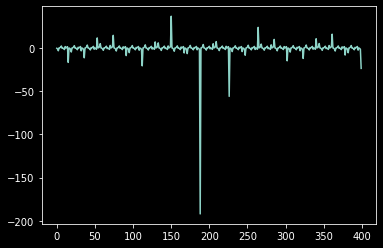

In [4]:
x = np.linspace(1,100,400)
f1 = np.sin(3*x)
f2 = np.sin(3*x)
f4 = np.sin(6*x)
f3 = f1+f2/f4

plt.plot(f3)

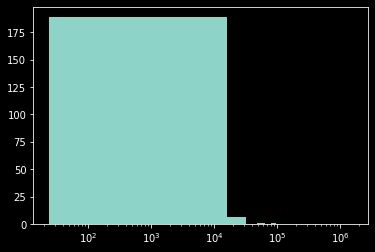

In [118]:


maxs = []
for n in np.arange(100,10000,50):
    x = np.linspace(1,100,n)
    f1 = np.sin(3*x)
    f2 = np.sin(3*x)
    f4 = np.sin(6*x)
    f3 = f1+f2/f4
#     plt.figure(figsize=(20,2))
#     plt.plot(x, f1)
#     plt.plot(x, f2)
#     plt.plot(x, f4)
#     plt.plot(x, f3, lw=2)
#     plt.show()
#     time.sleep(.1)
#     clear_output(wait=True)
    maxs.append(max(abs(f3)))
    
plt.hist(maxs, bins=100);    plt.xscale('log')

# Sum of sines

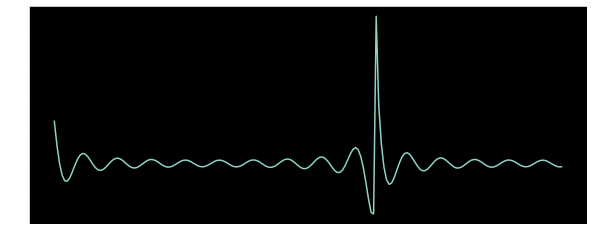

In [35]:
x = np.arange(1,100,0.5)
y = []
for i in np.linspace(1,100,1000):
    y.append((1/i)*np.sin(i*x)) #

summed = np.sum(y, axis=0)
plt.figure(figsize=(10,4))
plt.plot(x, summed)

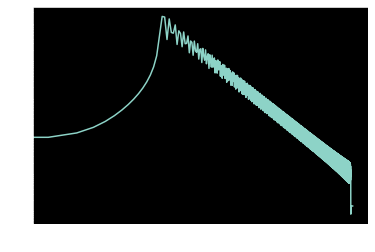

In [34]:
sr = 100.
ft = np.fft.rfft(summed)
psd = np.square(np.abs(ft))
freqs = np.linspace(0, sr/2, len(psd))
plt.loglog(freqs, psd)

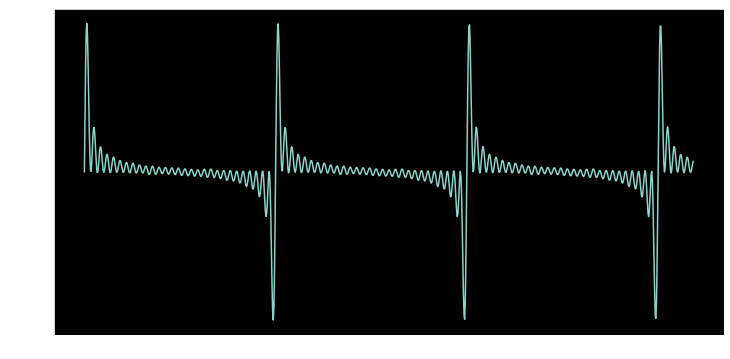

In [49]:
import numpy as np

x = np.linspace(0,20,1000)
summed = []
randints = np.random.randint(1,30,100000)
for n in randints:
    f = np.sin(n*x)
    summed.append(f)
    
plt.figure(figsize=(12,6))
plt.plot(np.array(summed).sum(0))